# Load Neccessary python Libraries

In [2]:
import os

In [4]:
#os.chdir('../scripts/')
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from textblob import TextBlob
#import spacy 
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Specter\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Specter\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
# Load Dataset 
df = pd.read_csv('C:\\Users\\Specter\\Documents\\raw_analyst_ratings.csv\\raw_analyst_ratings.csv')
df

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A
...,...,...,...,...,...,...
1048570,1053768,First Horizon National to Replace QLogic in S&...,https://www.benzinga.com/news/13/06/3678254/fi...,Paul Quintaro,6/14/2013 0:00,QLGC
1048571,1053769,"UPDATE: QLogic Announces Restructuring Plan, t...",https://www.benzinga.com/news/13/06/3645866/up...,Paul Quintaro,6/4/2013 0:00,QLGC
1048572,1053770,"QLogic Announces Restructuring Plan, to Cut Jo...",https://www.benzinga.com/news/13/06/3645825/ql...,Paul Quintaro,6/4/2013 0:00,QLGC
1048573,1053771,QLogic Corporation Reports Q4 EPS of $0.17 vs ...,https://www.benzinga.com/news/earnings/13/05/3...,Paul Quintaro,5/2/2013 0:00,QLGC


In [6]:
# removing Unnamed column from the dataset
df= df.loc[:,~df.columns.str.contains("Unnamed")]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   headline   1048575 non-null  object
 1   url        1048575 non-null  object
 2   publisher  1048575 non-null  object
 3   date       1048575 non-null  object
 4   stock      1048575 non-null  object
dtypes: object(5)
memory usage: 40.0+ MB


# Descriptive Statistics 
 # Obtaining basic statistics for textual lengths.

In [8]:
# Calculate headline length
df['headline_length'] = df['headline'].str.len()
df['headline_length']

0           39
1           42
2           29
3           44
4           87
          ... 
1048570     58
1048571    131
1048572    123
1048573     92
1048574     46
Name: headline_length, Length: 1048575, dtype: int64

In [10]:
# Descriptive statistics for headline length
headline_stats = df['headline_length'].describe().T
print("Descriptive Statistics for Headline Length:")
print(headline_stats)

Descriptive Statistics for Headline Length:
count    1.048575e+06
mean     7.300076e+01
std      4.029646e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


In [12]:
# Count articles by publisher
publisher_counts = df['publisher'].value_counts()

print("\nTop Publishers and their Article Counts:")
print(publisher_counts)


Top Publishers and their Article Counts:
publisher
Paul Quintaro                 168435
Lisa Levin                    139785
Benzinga Newsdesk             111281
Charles Gross                  72892
Monica Gerson                  61374
                               ...  
Silvio Tavares                     1
Matthew Boesler                    1
Bull Market Bear                   1
vic@forextraininggroup.com         1
Ryan Smith                         1
Name: count, Length: 984, dtype: int64


In [10]:
# Analyze Publication Dates

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Group articles by publication date
daily_articles = df.groupby(df['date'].dt.date).size()

print(f"\nNumber of Articles Published by Date: {daily_articles}")


Number of Articles Published by Date: date
2011-04-27      1
2011-04-28      2
2011-04-29      2
2011-04-30      1
2011-05-01      1
             ... 
2020-06-07     18
2020-06-08    564
2020-06-09    581
2020-06-10    552
2020-06-11    302
Length: 2418, dtype: int64


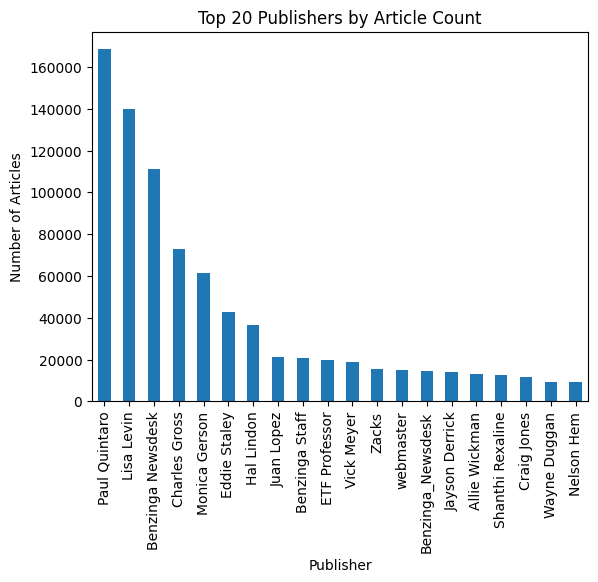

In [13]:
# Plot articles by publisher
publisher_counts.head(20).plot(kind='bar', title='Top 20 Publishers by Article Count')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.show()

In [ ]:
# Drop rows where 'date' is NaT and explicitly create a copy
df1 = df.dropna(subset=['date']).copy()

# Extract additional date components for analysis
df1['year'] = df1['date'].dt.year
df1['month'] = df1['date'].dt.month
df1['day'] = df1['date'].dt.day

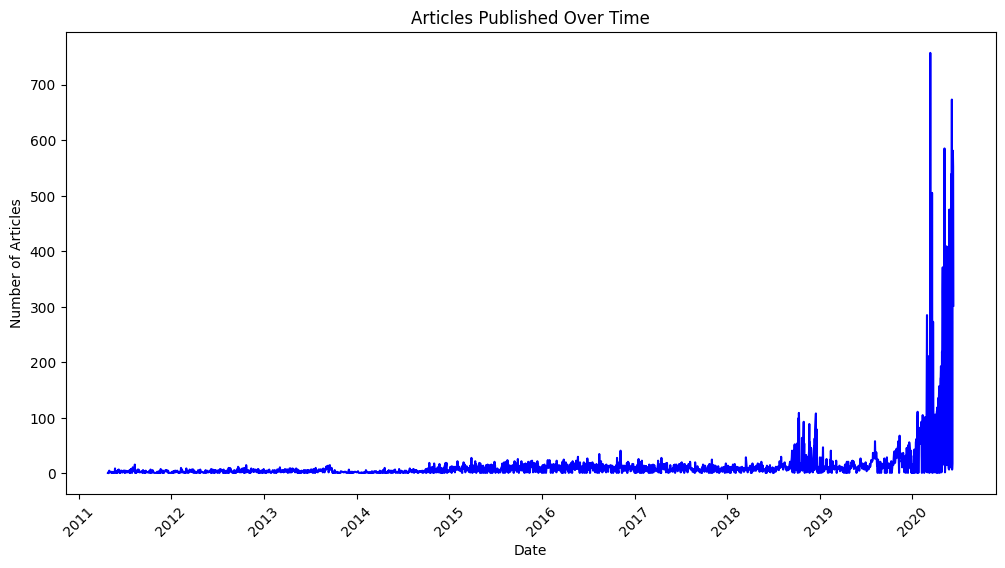

In [18]:
# Count the number of articles per day
daily_counts = df1['date'].dt.date.value_counts().sort_index()

# Plot the trend of articles over time
plt.figure(figsize=(12, 6))
daily_counts.plot(kind='line', color='blue')
plt.title("Articles Published Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.show()

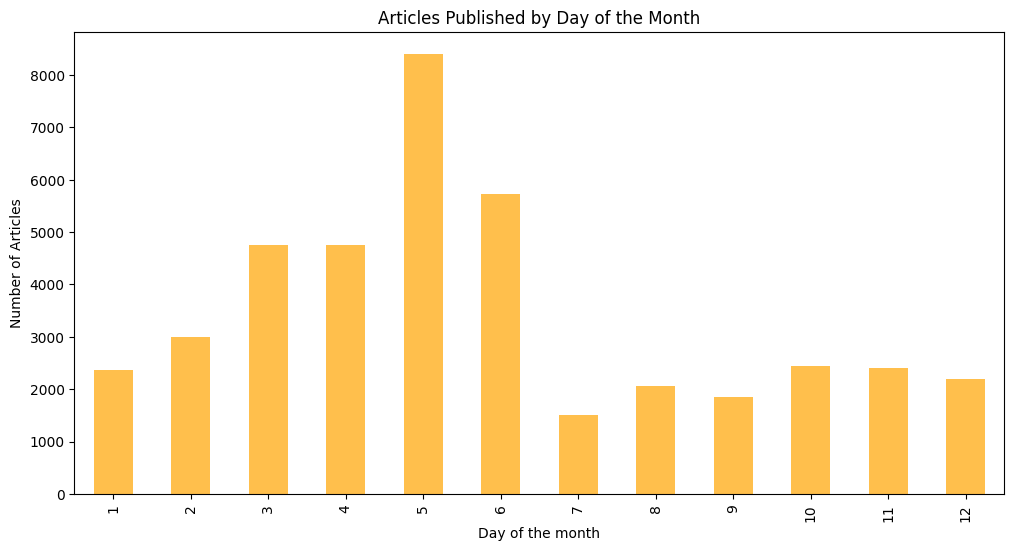

In [22]:
 # Count articles by day of the 'month'
monthly_counts = df1['month'].value_counts().sort_index()

# Plot the frequency of articles by day of the 'month'
plt.figure(figsize=(12, 6))
monthly_counts.plot(kind='bar', color='orange', alpha=0.7)
plt.title("Articles Published by Day of the Month")
plt.xlabel("Day of the month")
plt.ylabel("Number of Articles")
plt.show()
      

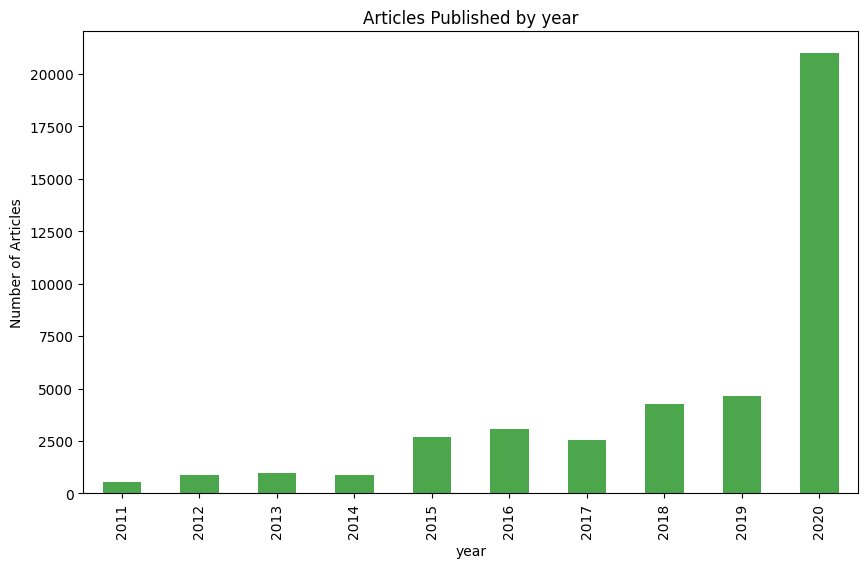

In [23]:
# Count articles by year
yearly_counts = df1['year'].value_counts().sort_index()

# Plot the frequency of articles by year
plt.figure(figsize=(10, 6))
yearly_counts.plot(kind='bar', color='green', alpha=0.7)
plt.title("Articles Published by year")
plt.xlabel("year")
plt.ylabel("Number of Articles")
plt.show()

# Sentiment Analysis
Sentiment analysis is a natural language processing (NLP) technique used to determine the emotional tone behind a piece of text. It categorizes the text into positive, negative, or neutral sentiments. This method is widely used for analyzing opinions in reviews, social media, news articles, and more.

In [20]:
# Perform sentiment analysis
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['headline'].apply(get_sentiment)

# Count the number of articles for each sentiment
sentiment_counts = df['sentiment'].value_counts()
print(f"\nSentiment Analysis Results: {sentiment_counts}")


Sentiment Analysis Results: sentiment
Neutral     694336
Positive    258964
Negative     95275
Name: count, dtype: int64


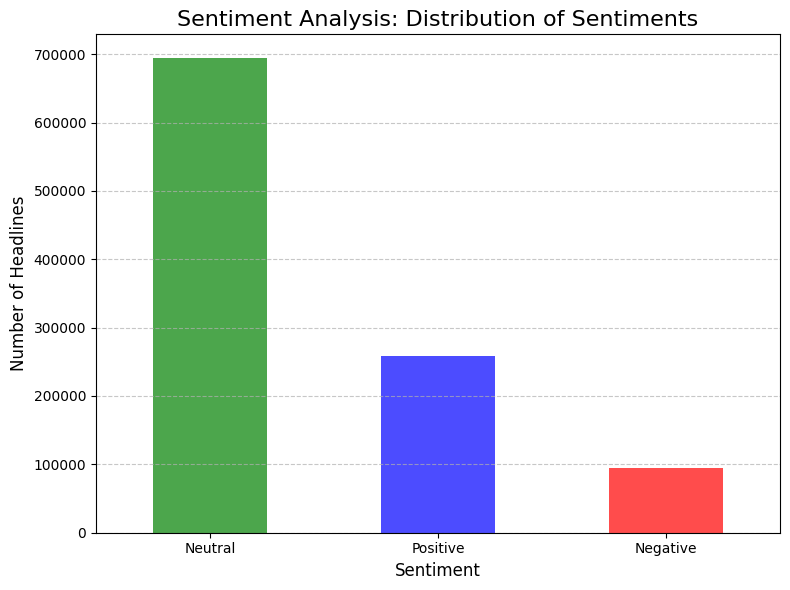

In [21]:
# Bar chart for sentiment analysis
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red'], alpha=0.7)

# Customize the plot
plt.title('Sentiment Analysis: Distribution of Sentiments', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Number of Headlines', fontsize=12)
plt.xticks(rotation=0)  # Rotate x-axis labels if necessary
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

In [15]:
# Define stopwords
stop_words = set(stopwords.words('english'))

# Tokenize and extract keywords
def extract_keywords(text):
    tokens = word_tokenize(text)
    keywords = [word.lower() for word in tokens if word.is_alpha() and word.lower() not in stop_words]
    return keywords

# Apply the function to the 'headline' column
#df['keywords'] = df['headline'].apply(extract_keywords)

In [ ]:
# Count most common keywords
all_keywords = [keyword for keywords in df['keywords'] for keyword in keywords]
common_keywords = Counter(all_keywords).most_common(20)

# Print the top 20 keywords
print(f"\nTop 20 Keywords: {common_keywords}")
